# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [41]:
!pip install -q scikit-learn==0.23.2 shap catboost category_encoders scikit-optimize==0.8.1

You should consider upgrading via the '/home/bac03704/.pyenv/versions/3.9.2/envs/nlp/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
from collections import Counter

import numpy as np
import pandas as pd

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import shap
from catboost import CatBoost, CatBoostClassifier, Pool

from category_encoders import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

In [6]:
for i in data.columns:
    print(f"Column '{i}' values: {data.loc[:, i].unique()}")

Column 'ID' values: [100097 101021 102965 ... 998425 999143 999194]
Column 'Subject' values: ['Por' 'Math']
Column 'school' values: ['GP' 'MS']
Column 'sex' values: ['F' 'M' 'm']
Column 'age' values: [16 17 18 15 19 21 20 22]
Column 'address' values: ['U' 'R']
Column 'famsize' values: ['GT3' 'LE3']
Column 'Pstatus' values: ['A' 'T' 't']
Column 'Medu' values: ['3' '1' '2' '4' '0' 'o']
Column 'Fedu' values: ['4' '2' '3' '1' 'o' '0']
Column 'Mjob' values: ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Column 'Fjob' values: ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
Column 'reason' values: ['course' 'home' 'reputation' 'other']
Column 'guardian' values: ['father' 'mother' 'other' 'futher']
Column 'traveltime' values: [1 2 3 4]
Column 'studytime' values: [1 2 4 3]
Column 'failures' values: [0 2 1 3]
Column 'schoolsup' values: ['no' 'yes']
Column 'famsup' values: ['no' 'yes']
Column 'paid' values: ['no' 'yes']
Column 'activities' values: ['no' 'yes']
Column 'nur

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [7]:
data = data.replace(
    {'sex': {'m': 'M'},
     'Pstatus': {'t': 'T'},
     'Medu': {'o': '0'},
     'Fedu': {'o': '0'},
     'Mjob': {'at-home': 'at_home'},
     'Fjob': {'at-home': 'at_home'},
     'guardian': {'futher': 'father'}
    }
)

data = data.drop(["ID"], axis=1)

data[['Medu', 'Fedu']] = data[['Medu', 'Fedu']].applymap(int)

data['cheating'] = data['cheating'].fillna('no')
data['romantic'] = data['romantic'].fillna('no')

imp = SimpleImputer(strategy="most_frequent")
data.iloc[:, :] = imp.fit_transform(data)

data.loc[:, ['famrel', 'Dalc', 'Walc']] = data.loc[:, ['famrel', 'Dalc', 'Walc']].astype(int)

cat_vars = ['Subject', 'school', 'sex', 'address', 'famsize',
            'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'cheating']

for i in cat_vars:
    data[i] = data[i].astype('category')

In [8]:
z = np.abs(stats.zscore(data.loc[:, ['absences', 'G1', 'G2', 'G3']]))
outliers = np.where(z > 3)
outlier_samples = data.iloc[outliers[0], :]

outlier_samples.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
27,Math,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,no,18,18,18
61,Por,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,no,0,11,11
83,Por,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3,5,4,1,4,1,0,yes,8,0,0
219,Por,GP,F,15,U,GT3,A,3,3,services,services,home,mother,1,2,0,no,no,no,no,no,yes,no,yes,1,3,2,2,3,1,24,yes,9,8,9
226,Por,GP,M,18,U,GT3,T,2,2,other,at_home,course,other,1,1,1,no,yes,no,yes,no,no,yes,yes,4,4,3,2,2,1,26,no,7,8,8


In [9]:
counter = Counter(outliers[1])

print(f'С помощью z-score было найдено {len(outliers[0])} выбросов по 4 признакам, указанным выше.\n')
print(f'Количество выбросов по каждому признаку:\n')

for idx, i in counter.items():
    print(f"{data.loc[:, ['absences', 'G1', 'G2', 'G3']].columns[idx]:8} --> {i}")

С помощью z-score было найдено 35 выбросов по 4 признакам, указанным выше.

Количество выбросов по каждому признаку:

absences --> 14
G1       --> 1
G2       --> 20


In [10]:
data = data[~data.index.isin(outlier_samples.index)]

In [11]:
data["G3"].value_counts()

10    153
11    147
13    113
12    103
14     89
15     82
8      63
9      60
16     51
17     35
0      33
18     26
7      19
6      17
5       8
19      7
1       1
4       1
20      1
Name: G3, dtype: int64

In [12]:
data = data[~data["G3"].isin([1, 4, 20])]
data = data.sample(frac=1).reset_index(drop=True)

In [13]:
X, y = data.drop(["G3"], axis=1), data["G3"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, train_size=0.8)

In [15]:
train_pool = Pool(X_train, y_train, cat_features=cat_vars)

In [18]:
cb = CatBoost()
cb.fit(train_pool, verbose=False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [19]:
feat_imps = [(feature, importance) for feature, importance in zip(X_train.columns, cb.get_feature_importance())]

sorted_feat_imps = sorted(feat_imps, key=lambda x: x[1], reverse=True)

df_imps = pd.DataFrame.from_records(sorted_feat_imps, columns=["feature", "importance"])

In [20]:
df_imps.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
feature,G2,G1,absences,Subject,studytime,health,age,goout,Mjob,famrel,failures,Fedu,freetime,Dalc,Medu,traveltime,Walc,reason,guardian,paid,activities,Fjob,sex,schoolsup,romantic,famsup,higher,nursery,cheating,internet,famsize,address,school,Pstatus
importance,53.362318,11.825674,9.973815,3.669122,2.221614,2.145572,1.761929,1.57104,1.484184,1.251479,1.131222,1.092001,0.927936,0.903632,0.892236,0.847196,0.774333,0.767901,0.753528,0.392476,0.384339,0.340832,0.336707,0.242626,0.178542,0.172302,0.160076,0.135682,0.087792,0.070365,0.055782,0.051397,0.027606,0.006745


In [21]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(X_train)

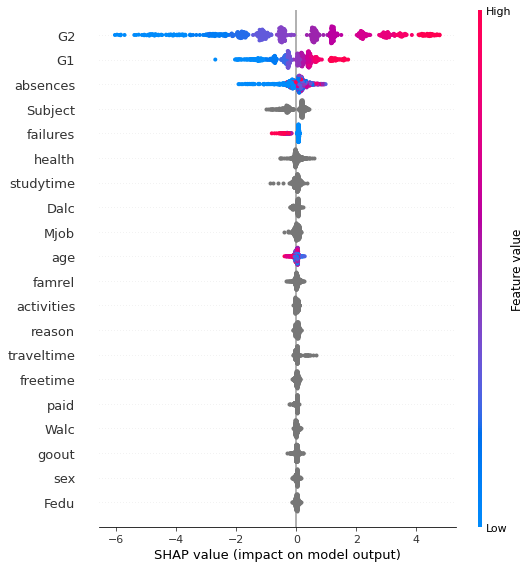

In [22]:
shap.summary_plot(shap_values, X_train)

In [23]:
unimp_feats = df_imps[df_imps.importance <= 0.5].feature.values
data = data.drop(unimp_feats, axis=1)
data.head()

,Subject,age,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,Math,16,4,4,services,reputation,mother,1,3,0,3,2,3,1,2,2,6,13,14,14
1,Math,18,3,3,services,other,mother,2,2,0,4,3,2,1,3,3,0,11,11,10
2,Math,17,0,2,at_home,home,father,2,3,0,3,3,3,2,3,2,0,16,15,15
3,Math,18,2,2,at_home,other,mother,2,3,0,5,3,3,1,3,4,2,10,9,10
4,Por,19,1,1,at_home,course,mother,1,1,0,1,4,4,1,1,5,0,6,8,7


<AxesSubplot:xlabel='G3', ylabel='Density'>

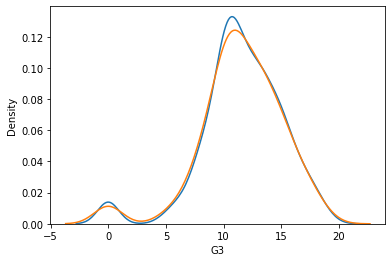

In [119]:
X_cat, y = data.drop(["G3"], axis=1), data["G3"]
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, stratify=y, random_state=42, train_size=0.8)

sns.kdeplot(y_train)
sns.kdeplot(y_test)

In [171]:
encoder = CatBoostEncoder()

In [172]:
X_train_cat.head()

,Subject,age,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
609,Por,19,3,3,other,reputation,other,1,4,0,4,3,3,1,2,3,4,12,12
224,Math,18,3,2,services,reputation,mother,2,3,0,5,4,2,1,1,4,8,14,13
315,Math,19,3,3,other,home,other,1,2,2,4,3,5,3,3,5,15,9,9
495,Math,18,1,1,at_home,reputation,mother,2,4,0,5,2,2,1,1,3,1,12,12
890,Math,15,4,4,health,course,father,1,1,0,4,3,3,1,3,5,2,14,14


In [173]:
X_train = X_train_cat.copy()
X_test = X_test_cat.copy()

In [174]:
X_train.iloc[:, [0, 4, 5, 6]] = encoder.fit_transform(X_train_cat.iloc[:, [0, 4, 5, 6]], y_train)
X_test.iloc[:, [0, 4, 5, 6]] = encoder.transform(X_test_cat.iloc[:, [0, 4, 5, 6]])

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [548]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import r2_score, mean_squared_error as mse_error, mean_absolute_error as mae_error, accuracy_score

In [612]:
class ModelTuner:
    def __init__(self, params, X_train, X_test, y_train, y_test, task="regression"):
        self.params = params
        self.task = task
        
        self.X_train_g2 = X_train.drop(["G2"], axis=1)
        self.X_test_g2 = X_test.drop(["G2"], axis=1)
        
        self.X_train_g12 = X_train.drop(["G2", "G1"], axis=1)
        self.X_test_g12 = X_test.drop(["G2", "G1"], axis=1)
        
        self.y_train = y_train
        self.y_test = y_test
        
        self.best_models = {
            "reg_g1": {"model": None, "metric": np.inf},
            "reg_g12": {"model": None, "metric": np.inf},
            "cls_g12": {"model": None, "metric": 0}
        }

    def tune_model(self):
        """
        Tunes regression models
        """
        self.eval_g1 = {}
        self.eval_g12 = {}
        
        for model_name, param in self.params.items():
            base_model = param.pop("model")
            n_iter = param.pop("n_iter")
            tuner = self._create_tuner(base_model, n_iter, param)
            
            # Without G2
            if self.task == "regression":
                tuner.fit(self.X_train_g2, self.y_train)
                model = tuner.best_estimator_
                self.eval_g1[f"{model_name}_g1"] = self._eval_model(model, self.X_test_g2)

                if (metric := self.eval_g1[f"{model_name}_g1"]["Metric Sum"]) < self.best_models["reg_g1"]["metric"]:
                    self.best_models["reg_g1"]["model"] = model
                    self.best_models["reg_g1"]["metric"] = metric

                print(f"Tuned {model.__class__.__name__} without G2.")

            # Without G1 and G2
            tuner.fit(self.X_train_g12, self.y_train)
            model = tuner.best_estimator_
            self.eval_g12[f"{model_name}_g12"] = self._eval_model(model, self.X_test_g12)
            
            metric = self.eval_g12[f"{model_name}_g12"]["Metric Sum"]
            
            if self.task == "regression":
                if metric < self.best_models["reg_g12"]["metric"]:
                    self.best_models["reg_g12"]["model"] = model
                    self.best_models["reg_g12"]["metric"] = metric
            
            if self.task == "classification":
                if metric > self.best_models["cls_g12"]["metric"]:
                    self.best_models["cls_g12"]["model"] = model
                    self.best_models["cls_g12"]["metric"] = metric
            
            print(f"Tuned {model.__class__.__name__} without G1 and G2.")

    def get_best_models(self):
        return self.best_models

    def report_stats(self, stage="g1"):
        """
        Reports evaluation stats
        """
        if stage == "g1" and self.task == "classification":
            raise NotImplementedError
        
        if stage == "g1" and self.task == "regression":
            return pd.DataFrame.from_dict(self.eval_g1).T.sort_values(by="Metric Sum", ascending=True)
        
        return pd.DataFrame.from_dict(self.eval_g12).T.sort_values(by="Metric Sum", ascending=True)

    def _eval_model(self, model, X_test):
        """
        Evaluates model performance and outputs errors
        """
        if self.task == "regression":
            r2 = 1 - r2_score(self.y_test, model.predict(X_test))
            mse = mse_error(self.y_test, model.predict(X_test))
            mae = mae_error(self.y_test, model.predict(X_test))

            metric_sum = r2 + mse + mae

            return {
                "R2 Error": r2,
                "MSE": mse,
                "MAE": mae,
                "Metric Sum": metric_sum
            }
        
        if self.task == "classification":
            f1 = f1_score(self.y_test, model.predict(X_test), average="weighted")
            accuracy = accuracy_score(self.y_test, model.predict(X_test))
            
            metric_sum = f1 + accuracy
            
            return {
                "Accuracy": accuracy,
                "F1": f1,
                "Metric Sum": metric_sum
            }

    @staticmethod
    def _create_tuner(model, n_iter, param):
        """
        Tunes ML models
        """
        model = BayesSearchCV(
            model,
            param,
            n_iter=n_iter,
            random_state=42,
            cv=5,
            n_jobs=-1
        )

        return model

In [614]:
linreg_params = {
    "model": LinearRegression(n_jobs=-1),
    "n_iter": 10,
    "fit_intercept": Categorical([True, False]),
    "normalize": Categorical([True, False])
}

lasso_params = {
    "model": Lasso(),
    "n_iter": 10,
    "alpha": Real(1e-1, 1, prior='log-uniform'),
    "fit_intercept": Categorical([True, False]),
    "normalize": Categorical([True, False])
}

ridge_params = {
    "model": Ridge(),
    "n_iter": 10,
    "alpha": Real(1e-1, 1, prior='log-uniform'),
    "fit_intercept": Categorical([True, False]),
    "normalize": Categorical([True, False])
}

elastic_params = {
    "model": ElasticNet(),
    "n_iter": 10,
    "alpha": Real(1e-1, 1, prior='log-uniform'),
    "l1_ratio": Real(1e-1, 1, prior='log-uniform'),
    "fit_intercept": Categorical([True, False]),
    "normalize": Categorical([True, False])
}

poly_params = {
    "model": Pipeline([
        ("poly", PolynomialFeatures(degree=2)),
        ("linreg", LinearRegression(n_jobs=-1))
    ]),
    "n_iter": 2,
    "linreg__normalize": Categorical([True, False])
}

knn_params = {
    "model": KNeighborsRegressor(n_jobs=-1),
    "n_iter": 10,
    "n_neighbors": Integer(1, 30),
    "weights": Categorical(["uniform", "distance"]),
    "leaf_size": Integer(5, 100)
}

tree_params = {
    "model": DecisionTreeRegressor(),
    "n_iter": 10,
    "criterion": Categorical(["mse", "friedman_mse", "mae"]),
    "min_samples_split": Integer(2, 5),
    "min_samples_leaf": Integer(2, 5)
}

forest_params = {
    "model": RandomForestRegressor(n_jobs=-1),
    "n_iter": 5,
    "n_estimators": Integer(90, 100),
    "min_samples_leaf": Integer(2, 3)
}


params = {}

params["linreg"] = linreg_params
params["lasso"] = lasso_params
params["ridge"] = ridge_params
params["elastic"] = elastic_params
params["poly"] = poly_params
params["knn"] = knn_params
params["tree"] = tree_params
params["forest"] = forest_params

In [615]:
regression_tuner = ModelTuner(params, X_train, X_test, y_train, y_test)

In [616]:
regression_tuner.tune_model()

Tuned LinearRegression without G2.
Tuned LinearRegression without G1 and G2.
Tuned Lasso without G2.
Tuned Lasso without G1 and G2.
Tuned Ridge without G2.
Tuned Ridge without G1 and G2.
Tuned ElasticNet without G2.
Tuned ElasticNet without G1 and G2.
Tuned Pipeline without G2.
Tuned Pipeline without G1 and G2.
Tuned KNeighborsRegressor without G2.
Tuned KNeighborsRegressor without G1 and G2.
Tuned DecisionTreeRegressor without G2.
Tuned DecisionTreeRegressor without G1 and G2.
Tuned RandomForestRegressor without G2.
Tuned RandomForestRegressor without G1 and G2.


In [619]:
regression_tuner.report_stats(stage="g1")

,R2 Error,MSE,MAE,Metric Sum
knn_g1,0.313733,3.945545,1.376238,5.635515
elastic_g1,0.335393,4.217939,1.333470,5.886802
forest_g1,0.334653,4.208637,1.368111,5.911401
lasso_g1,0.342772,4.310745,1.333173,5.986690
ridge_g1,0.348688,4.385145,1.369149,6.102982
linreg_g1,0.348858,4.387274,1.369639,6.105771
poly_g1,0.344676,4.334684,1.506586,6.185946
tree_g1,0.470062,5.911556,1.693729,8.075347


In [181]:
regression_tuner.report_stats(stage="g12")

,R2 Error,MSE,MAE,Error Sum
forest_g12,0.745050,9.369844,2.328149,12.443044
elastic_g12,0.835399,10.506074,2.404758,13.746231
lasso_g12,0.853380,10.732212,2.398550,13.984143
ridge_g12,0.858429,10.795703,2.426042,14.080174
linreg_g12,0.858783,10.800154,2.426407,14.085344
knn_g12,0.882654,11.100368,2.423990,14.407013
poly_g12,0.883528,11.111349,2.546596,14.541473
tree_g12,1.048467,13.185644,2.589109,16.823219


In [182]:
regression_tuner.get_best_models()

{'g1': {'model': RandomForestRegressor(min_samples_leaf=3, n_estimators=99, n_jobs=-1),
  'error': 5.6289814495754875},
 'g12': {'model': RandomForestRegressor(min_samples_leaf=3, n_estimators=99, n_jobs=-1),
  'error': 12.44304421632073}}

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [318]:
from pprint import pprint
from collections import defaultdict

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [235]:
X_train_g12 = X_train.drop(["G1", "G2"], axis=1)
X_test_g12 = X_test.drop(["G1", "G2"], axis=1)

In [228]:
y_train_bin = np.where(y_train >= 8, 1, 0)
y_test_bin = np.where(y_test >= 8, 1, 0)

In [185]:
tree = DecisionTreeClassifier(max_depth=5)
tree_info = cross_validate(tree, X_train_g12, y_train_bin, cv=5, return_estimator=True, n_jobs=-1)

pprint(tree_info)

{'estimator': (DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=5)),
 'fit_time': array([0.01575565, 0.01957226, 0.02667451, 0.03672314, 0.01695538]),
 'score_time': array([0.00879812, 0.00871158, 0.00950027, 0.01199675, 0.00935197]),
 'test_score': array([0.88819876, 0.9068323 , 0.93167702, 0.91304348, 0.8875    ])}


In [186]:
X_train.columns.values

array(['Subject', 'age', 'Medu', 'Fedu', 'Mjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype=object)

In [187]:
encoder.get_feature_names()

['Subject', 'Mjob', 'reason', 'guardian']

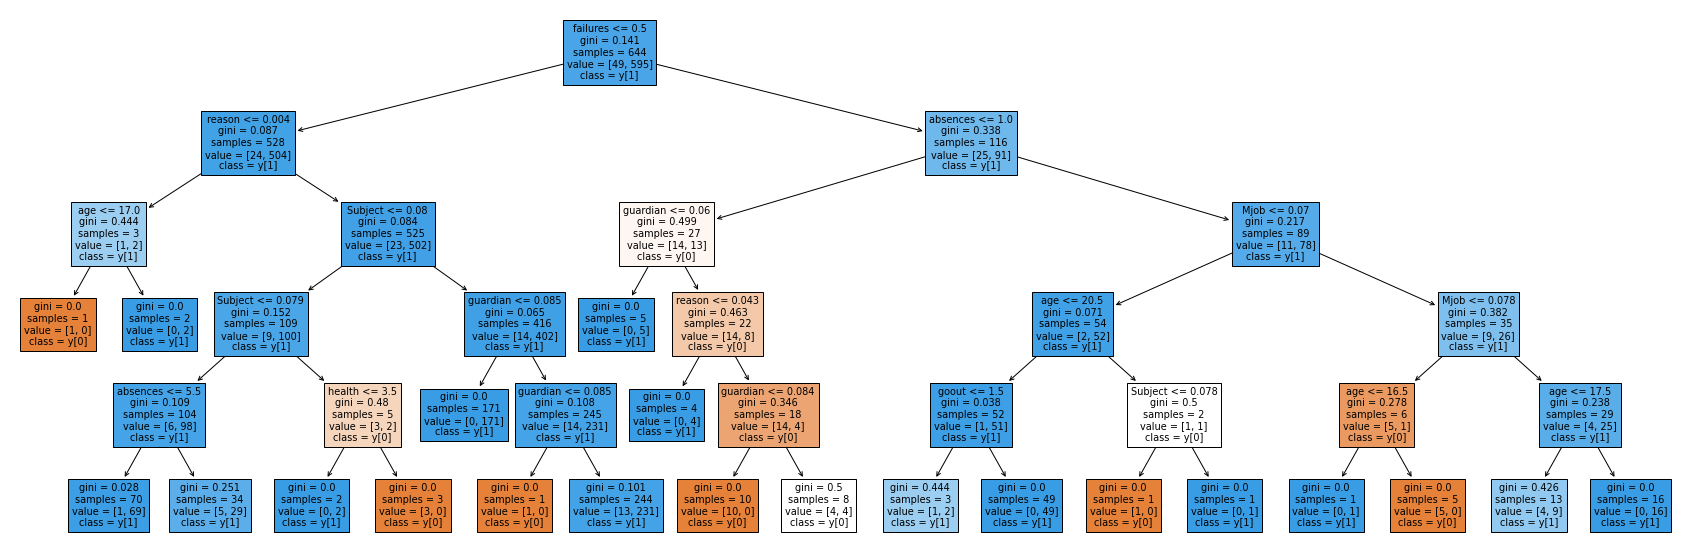

In [168]:
plt.figure(figsize=(30, 10))
plot_tree(tree_info["estimator"][-1], filled=True, class_names=True, feature_names=X_train_g12.columns)
plt.show()

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [265]:
forest_params = {"n_estimators": [1, 10, 50, 90, 100]}
forest_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

forest_tuner = GridSearchCV(
    RandomForestClassifier(n_jobs=-1),
    forest_params,
    cv=forest_cv
)

forest_tuner.fit(X_train_g12, y_train_bin)
forest_info = forest_tuner.cv_results_

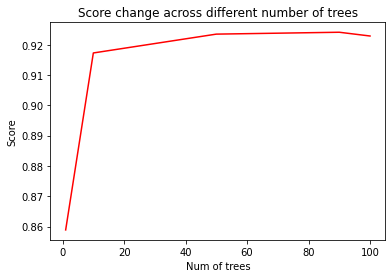

In [267]:
x = [1, 10, 50, 90, 100]
y = forest_info["mean_test_score"]

plt.title("Score change across different number of trees")
plt.xlabel("Num of trees")
plt.ylabel("Score")

plt.plot(x, y, color ="red")
plt.show()

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [220]:
%%time

forest_params = {
    "n_estimators": Integer(1, 100),
    "min_samples_split": Integer(2, 5),
    "min_samples_leaf": Integer(1, 4)
}

forest_tuner = BayesSearchCV(
    RandomForestClassifier(n_jobs=-1),
    forest_params,
    cv=5,
    n_iter=20,
    scoring="f1"
)

forest_tuner.fit(X_train_g12, y_train_bin)
forest_model = forest_tuner.best_estimator_

CPU times: user 47.4 s, sys: 38 s, total: 1min 25s
Wall time: 23.4 s


In [230]:
forest_model.fit(X_train_g12, y_train_bin)

RandomForestClassifier(min_samples_split=3, n_estimators=45, n_jobs=-1)

In [236]:
f1_score(y_test_bin, forest_model.predict(X_test_g12))

0.9612403100775194

In [258]:
forest_trees = defaultdict(dict)

for idx, estimator in enumerate(forest_model.estimators_):
    forest_trees[f"Tree_{idx}"]["F1"] = f1_score(y_test_bin, estimator.predict(X_test_g12))
    
tree_eval = pd.DataFrame.from_dict(forest_trees)

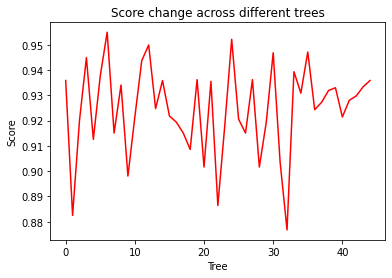

In [260]:
x = np.arange(0, 45)
y = tree_eval.loc["F1"].values

plt.title("Score change across different trees")
plt.xlabel("Tree")
plt.ylabel("Score")

plt.plot(x, y, color ="red")
plt.show()

In [263]:
pd.DataFrame({"Feature": X_train_g12.columns, "Importance": forest_model.feature_importances_}).sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Subject,0.140136
4,Mjob,0.129455
6,guardian,0.102963
5,reason,0.096091
16,absences,0.084784
9,failures,0.071463
10,famrel,0.045085
1,age,0.044548
12,goout,0.043275
11,freetime,0.039004


### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [295]:
logreg_params = {
    "C": Real(1e-2, 1e2),
    "solver": Categorical(["lbfgs", "saga"]),
    "max_iter": Categorical([1000, 100000])
}

logreg_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

logreg_tuner = BayesSearchCV(
    LogisticRegression(n_jobs=-1),
    logreg_params,
    cv=5,
    n_iter=20,
    scoring="roc_auc"
)

logreg_tuner.fit(X_train_g12, y_train_bin)
logreg_model = logreg_tuner.best_estimator_

In [300]:
logreg_scores = cross_val_score(logreg_model, X_test_g12, y_test_bin, cv=logreg_cv)
forest_scores = cross_val_score(forest_model, X_test_g12, y_test_bin, cv=logreg_cv)

In [317]:
print(f"Logreg scores: {logreg_scores} \nAverage: {sum(logreg_scores) / len(logreg_scores)}")
print("\n")
print(f"Logreg scores: {forest_scores} \nAverage: {sum(forest_scores) / len(forest_scores)}")

Logreg scores: [0.90243902 0.90243902 0.825      0.925      0.925      0.87804878
 0.85365854 0.875      0.925      0.925     ] 
Average: 0.893658536585366


Logreg scores: [0.92682927 0.90243902 0.875      0.925      0.925      0.92682927
 0.90243902 0.925      0.925      0.9       ] 
Average: 0.9133536585365853


ROC AUC score: 0.5258736559139785


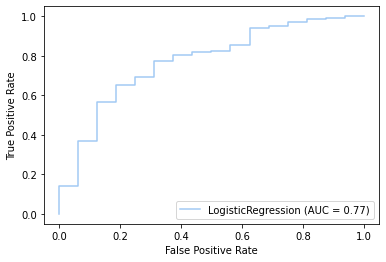

In [319]:
logreg_model.fit(X_train_g12, y_train_bin)

print(f"ROC AUC score: {roc_auc_score(y_test_bin, logreg_model.predict(X_test_g12))}")

plot_roc_curve(logreg_model, X_test_g12, y_test_bin)

ROC AUC score: 0.53125


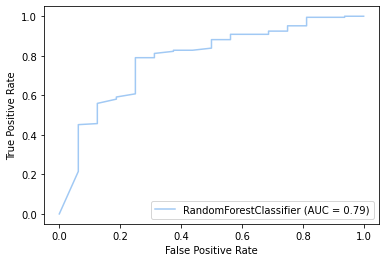

In [320]:
print(f"ROC AUC score: {roc_auc_score(y_test_bin, forest_model.predict(X_test_g12))}")

plot_roc_curve(forest_model, X_test_g12, y_test_bin)

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [719]:
from catboost import metrics

In [325]:
X_train_cat_g12 = X_train_cat.drop(["G1", "G2"], axis=1)
X_test_cat_g12 = X_test_cat.drop(["G1", "G2"], axis=1)

In [721]:
cb_params = {
    "num_trees": np.arange(1, 100)
}

cat_vars = X_train_cat_g12.drop(["age", "absences"], axis=1).columns.tolist()

cb_train = Pool(X_train_cat_g12, y_train_bin, cat_features=cat_vars)
cb_test = Pool(X_test_cat_g12, y_test_bin, cat_features=cat_vars)

cb_model = CatBoostClassifier(logging_level="Silent", custom_metric=metrics.F1())
cb_scores = cb_model.grid_search(cb_params, cb_train, verbose=False, cv=5)

<AxesSubplot:>

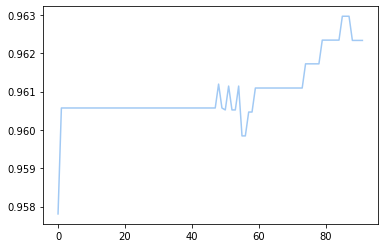

In [730]:
sns.lineplot(data=cb_scores["cv_results"]["test-F1-mean"])

In [737]:
%%time

catboost_params = {
    "iterations": Integer(10, 1000),
    "depth": Integer(1, 8),
    "learning_rate": Real(0.01, 1.0, "log-uniform"),
    "random_strength": Real(1e-9, 10, "log-uniform"),
    "bagging_temperature": Real(0.0, 1.0),
    "l2_leaf_reg": Integer(2, 30)
}

cb_tuner = BayesSearchCV(
    CatBoostClassifier(verbose=0, cat_features=cat_vars, custom_metric=metrics.F1()),
    catboost_params,
    cv=5,
    n_iter=5
)

cb_tuner.fit(X_train_cat_g12, y_train_bin)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

CPU times: user 1min 53s, sys: 13.1 s, total: 2min 6s
Wall time: 32.3 s


BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostClassifier object at 0x7fed42c63070>,
              n_iter=5,
              search_spaces={'bagging_temperature': Real(low=0.0, high=1.0, prior='uniform', transform='identity'),
                             'depth': Integer(low=1, high=8, prior='uniform', transform='identity'),
                             'iterations': Integer(low=10, high=1000, prior='uniform', transform='identity'),
                             'l2_leaf_reg': Integer(low=2, high=30, prior='uniform', transform='identity'),
                             'learning_rate': Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
                             'random_strength': Real(low=1e-09, high=10, prior='log-uniform', transform='identity')})

In [759]:
catboost_model = cb_tuner.best_estimator_
catboost_model.best_score_

{'learn': {'F1': 0.9680781758957655, 'Logloss': 0.1828691923548848}}

In [756]:
full_cb_model = CatBoostClassifier(verbose=0, custom_metric=metrics.F1())
full_cb_model.set_params(**catboost_model.get_params())
full_cb_model.fit(cb_train, eval_set=cb_test)

In [760]:
full_cb_model.best_score_

{'learn': {'F1': 0.9680781758957655, 'Logloss': 0.1828691923548848},
 'validation': {'F1': 0.96875, 'Logloss': 0.223086123313649}}

<AxesSubplot:>

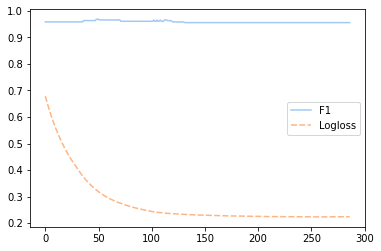

In [758]:
sns.lineplot(data=full_cb_model.get_evals_result()["validation"])

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [380]:
from sklearn.neighbors import KNeighborsClassifier

In [487]:
bins = pd.IntervalIndex.from_tuples([(0, 7), (8, 13), (14, 17), (18, 20)], closed="both")

y_train_multi = pd.cut(y_train.tolist(), bins)
y_test_multi = pd.cut(y_test.tolist(), bins)

y_train_multi.categories = y_test_multi.categories = [0, 1, 2, 3]

y_train_multi = y_train_multi.to_numpy()
y_test_multi = y_test_multi.to_numpy()

In [679]:
knn_params = {
    "model": KNeighborsClassifier(),
    "n_iter": 15,
    "n_neighbors": Integer(3, 15),
    "leaf_size": Integer(10, 30),
    "weights": Categorical(["uniform", "distance"])
}

logreg_params = {
    "model": LogisticRegression(),
    "n_iter": 10,
    "max_iter": [1000],
    "solver": Categorical(["saga"]),
    "penalty": Categorical(["l1", "l2", "elasticnet"]),
    "l1_ratio": Real(0.1, 1, prior="luniform"),
    "C": Real(1e-1, 1, prior="log-uniform"),
    "tol": Real(1e-4, 1e-3, prior="uniform"),
    "fit_intercept": Categorical([True, False])
}

tree_params = {
    "model": DecisionTreeClassifier(),
    "n_iter": 10,
    "max_depth": Integer(2, 10),
    "min_samples_leaf": Integer(1, 3),
    "min_samples_split": Integer(2, 4)
}

forest_params = {
    "model": RandomForestClassifier(),
    "n_iter": 10,
    "n_estimators": Integer(1, 100),
    "min_samples_split": Integer(2, 5),
    "min_samples_leaf": Integer(1, 4)
}

catboost_params = {
    "model": CatBoostClassifier(cat_features=cat_vars, verbose=0),
    "n_iter": 5,
    "iterations": Integer(10, 1000),
    "depth": Integer(1, 8),
    "learning_rate": Real(0.01, 1.0, "log-uniform"),
    "random_strength": Real(1e-9, 10, "log-uniform"),
    "bagging_temperature": Real(0.0, 1.0),
    "l2_leaf_reg": Integer(2, 30)
}


params = {}
params["knn"] = knn_params
params["tree"] = tree_params
params["logreg"] = logreg_params
params["forest"] = forest_params

cb_params = {}
cb_params["catboost"] = catboost_params

In [621]:
tuner = ModelTuner(params, X_train, X_test, y_train_multi, y_test_multi, task="classification")

In [622]:
tuner.tune_model()

Tuned KNeighborsClassifier without G1 and G2.
Tuned DecisionTreeClassifier without G1 and G2.


l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)


Tuned LogisticRegression without G1 and G2.
Tuned RandomForestClassifier without G1 and G2.


In [680]:
cb_tuner = ModelTuner(cb_params, X_train_cat, X_test_cat, y_train_multi, y_test_multi, task="classification")

In [681]:
cb_tuner.tune_model()

Tuned CatBoostClassifier without G1 and G2.


In [682]:
tuner.report_stats(stage="g12")

,Accuracy,F1,Metric Sum
tree_g12,0.628713,0.513777,1.142490
forest_g12,0.633663,0.554132,1.187795
logreg_g12,0.623762,0.572238,1.196000
knn_g12,0.648515,0.572681,1.221196


In [683]:
cb_tuner.report_stats(stage="g12")

,Accuracy,F1,Metric Sum
catboost_g12,0.638614,0.60176,1.240374
